# import the libraries which is use in this assingments


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


Q-1
Read the hotel dataset.


In [6]:
df= pd.read_csv(r"C:\Users\admin\OneDrive\Desktop\Machine learning Assingments\Supervised machiner learning\2_clasificaton\hotel.csv")


Q-2  Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.


In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
hotel_data=df.copy()

In [9]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Missing values treatment**

In [12]:
# hotel_data2=hotel_data.copy()

In [13]:
# here we using the simple imputer to treat the missing values 
imputer = SimpleImputer(strategy="median")
hotel_data[['children', 'agent','company']] = imputer.fit_transform(hotel_data[['children', 'agent','company']])
imputer = SimpleImputer(strategy="most_frequent")
hotel_data[['country']] = imputer.fit_transform(hotel_data[['country']])


In [14]:
hotel_data.isnull().sum() # After filling the missing values check the missing values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

find the duplicate values

In [15]:
hotel_data.duplicated().sum() # here we check the missing values 

32013

In [16]:
hotel_data.drop_duplicates(inplace=True) # Drop the duplicate values in the entire data set

here we fill the all null values 

old way to treating the missing values by using the fillna method

In [17]:
df['country'].fillna(df['country'].mode()[0], inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_28076\1308972069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


# Spliting the data into the  X and y 

In [18]:
X = hotel_data.drop('is_canceled', axis=1)
y=hotel_data['is_canceled']


 Here seprate the categorical data or numerical data  By using the simple user define function 

In [19]:
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(X)

In [20]:
num_data=X[numerical]
cat_data=X[categorical]

In [21]:
cat_data.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03


In [22]:
num_data.head()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,14.0,179.0,0,0.0,0,0
1,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,14.0,179.0,0,0.0,0,0
2,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,14.0,179.0,0,75.0,0,0
3,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,179.0,0,75.0,0,0
4,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,179.0,0,98.0,0,1


Analyze the categorical data.


<Axes: xlabel='reservation_status', ylabel='count'>

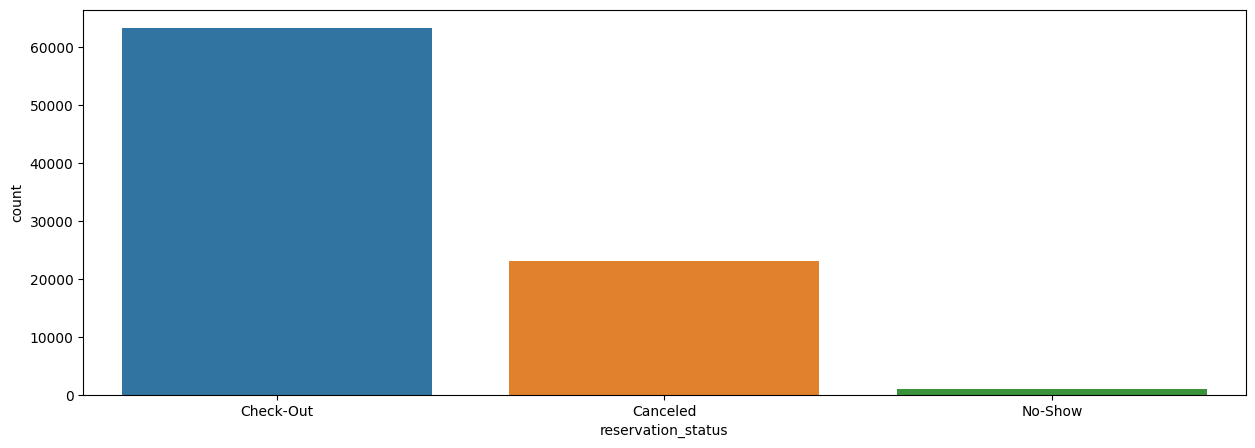

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(X,x='reservation_status')

<Axes: xlabel='customer_type', ylabel='count'>

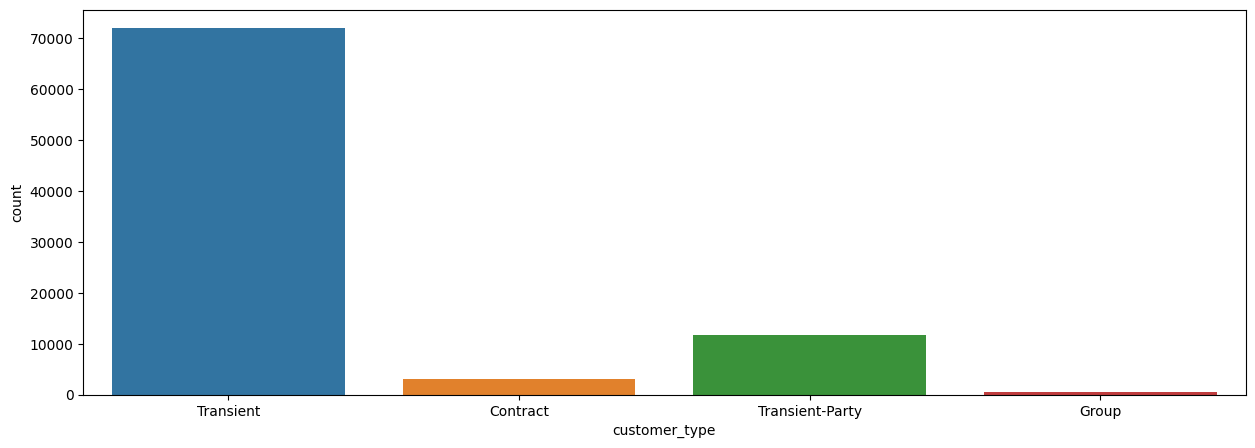

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(X,x='customer_type')

<Axes: xlabel='deposit_type', ylabel='count'>

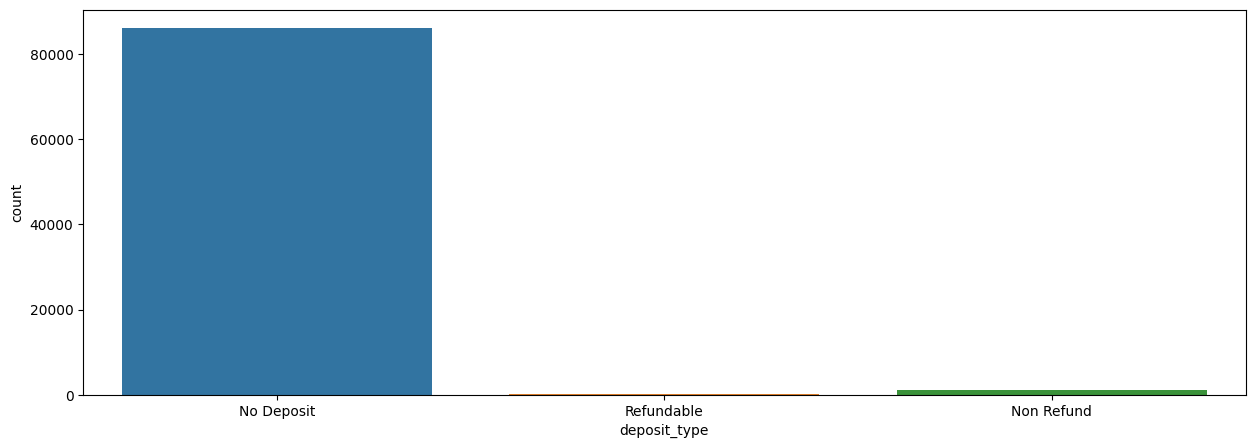

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(X,x='deposit_type')

<Axes: xlabel='assigned_room_type', ylabel='count'>

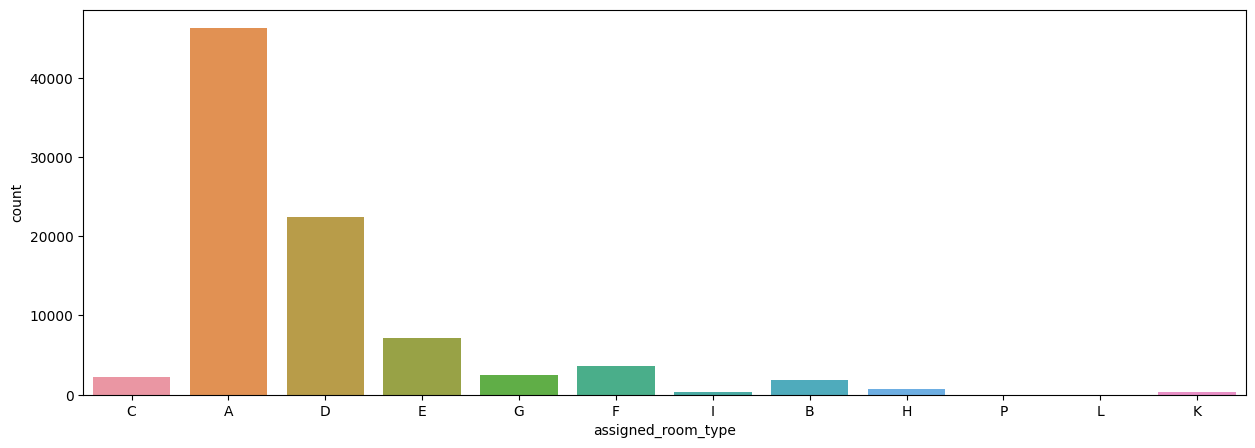

In [26]:
plt.figure(figsize=(15,5))
sns.countplot(X,x='assigned_room_type')

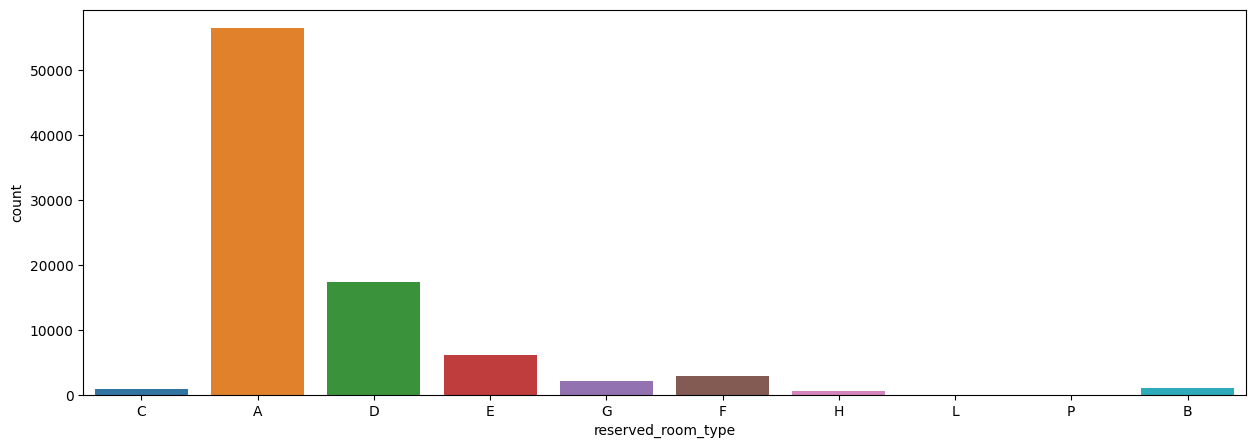

In [27]:
plt.figure(figsize=(15,5))

sns.countplot(X,x='reserved_room_type',)
plt.show()

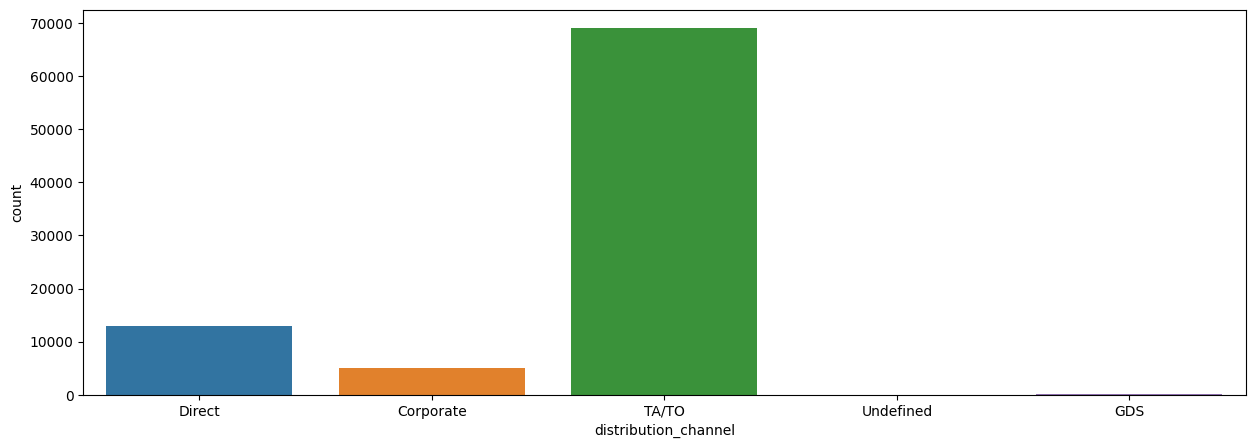

In [28]:
plt.figure(figsize=(15,5))

sns.countplot(X,x='distribution_channel',)
plt.show()

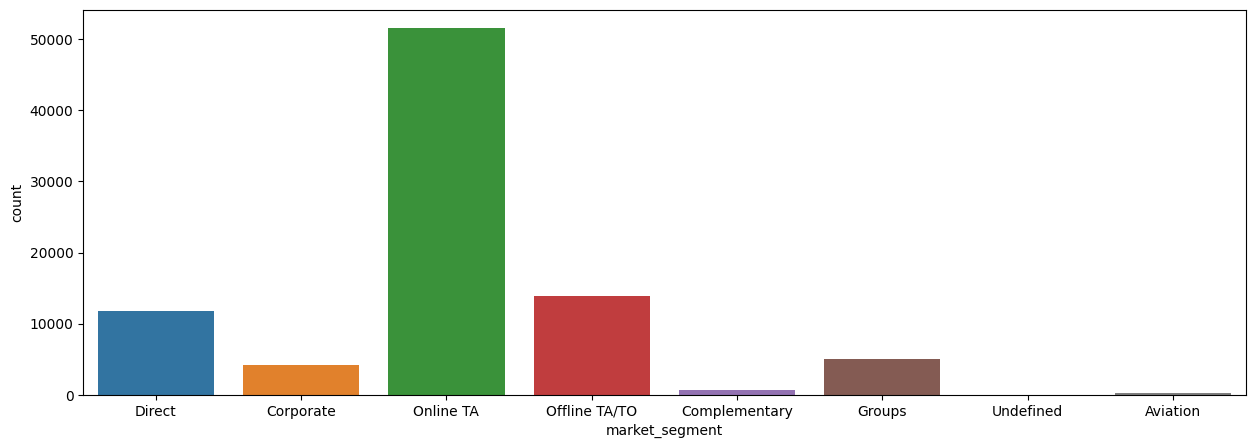

In [29]:
plt.figure(figsize=(15,5))

sns.countplot(X,x='market_segment',)
plt.show()

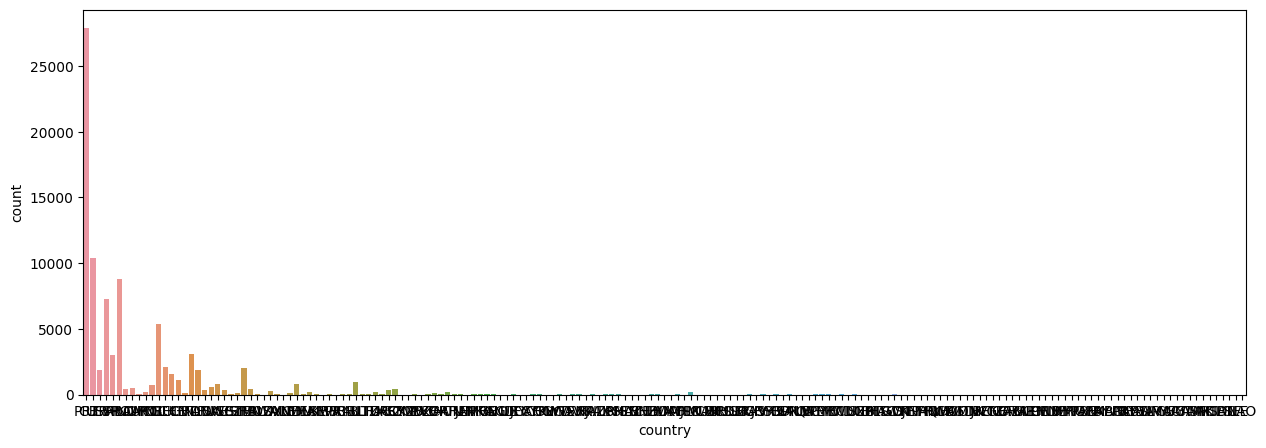

In [30]:
plt.figure(figsize=(15,5))

sns.countplot(X,x='country',)
plt.show()

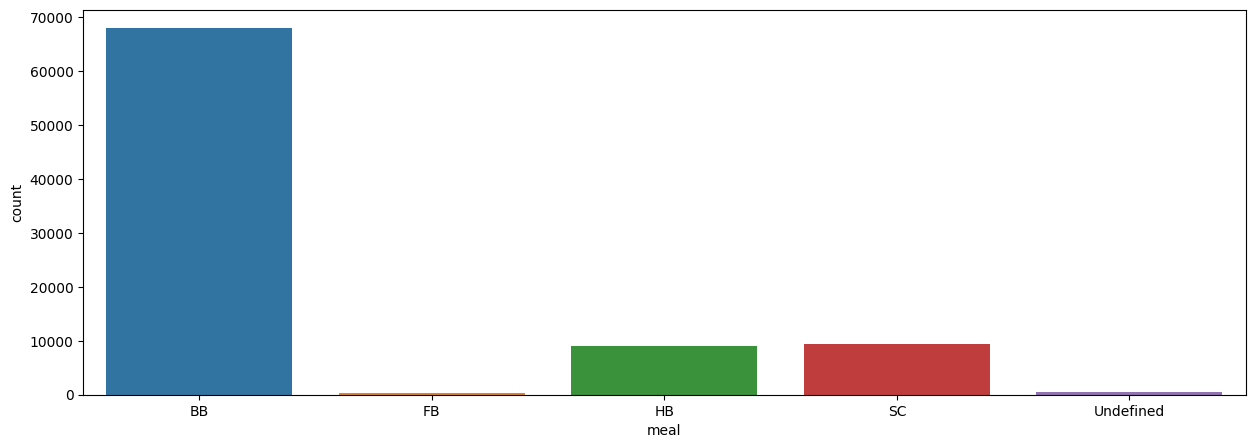

In [31]:
plt.figure(figsize=(15,5))

sns.countplot(X,x='meal')
plt.show()

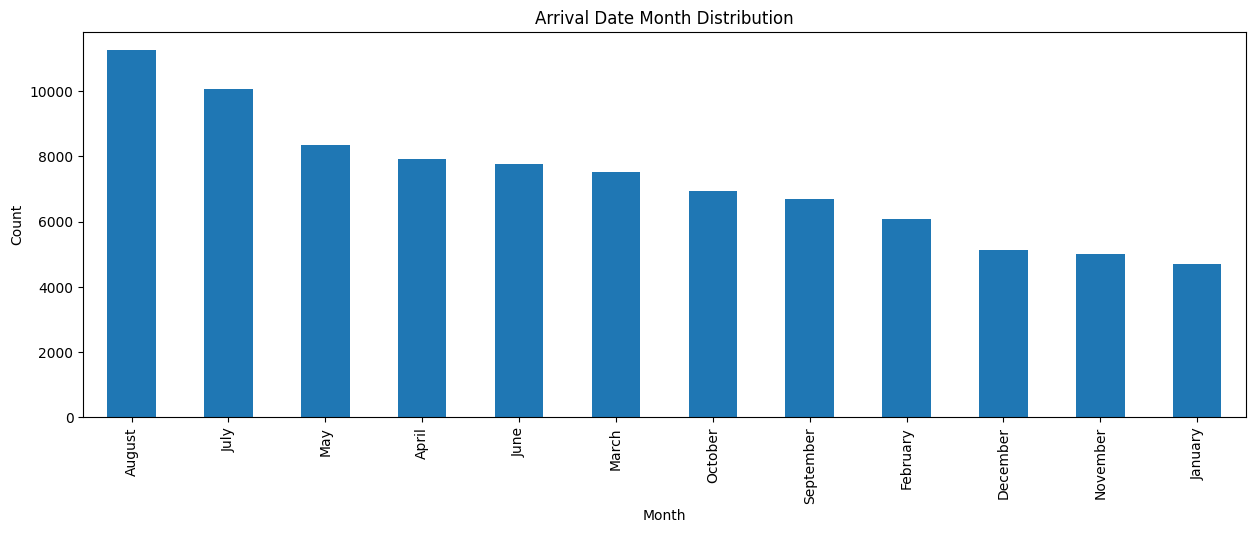

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
X['arrival_date_month'].value_counts().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arrival Date Month Distribution')
plt.show()


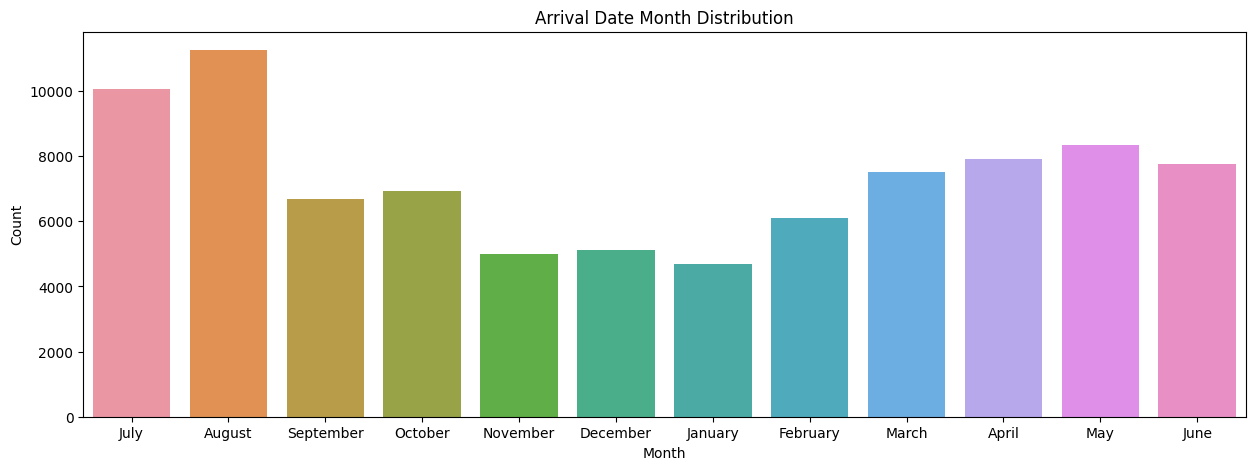

In [33]:
plt.figure(figsize=(15,5))

sns.countplot(X,x='arrival_date_month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Arrival Date Month Distribution')
plt.show()

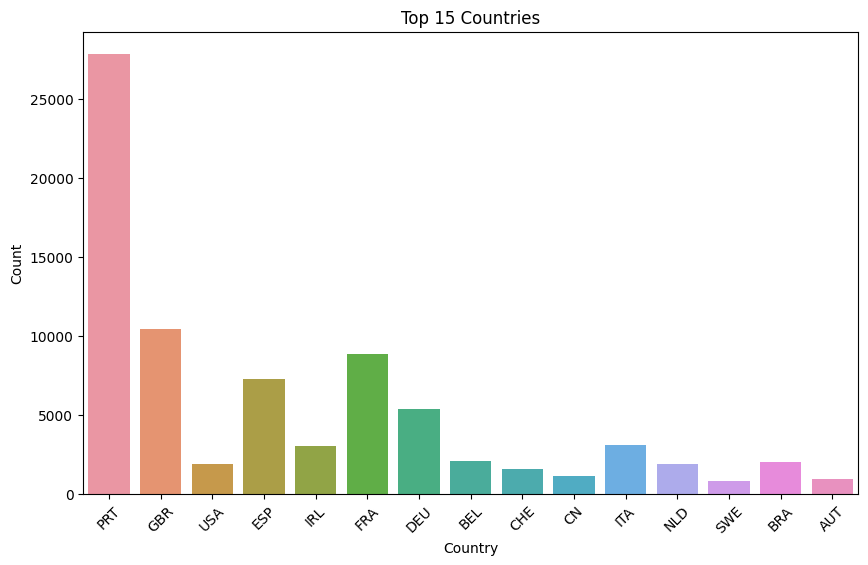

In [34]:


# Assuming 'df' is your DataFrame and 'country' is the column containing country names

# Get the top 15 countries
top_countries = X['country'].value_counts().head(15).index

# Filter the DataFrame to include only the top 15 countries
df_top_countries = X[X['country'].isin(top_countries)]

# Create the count plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=df_top_countries, x='country')

# Rotate x-labels for better readability
plt.xticks(rotation=45)

plt.title('Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()


Transform the categorical data using the One hot encoder or Label encoder.


In [35]:
cat_column=cat_data.columns
cat_column

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [36]:
ohe = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)


In [37]:
X_new = ohe.fit_transform(X[cat_column])


In [38]:
X_new

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# Transform the numerical data using the Power transform.


In [39]:
power_transformer = PowerTransformer()
num_data[['lead_time', 'adr']] = power_transformer.fit_transform(num_data[['lead_time', 'adr']])

C:\Users\admin\AppData\Local\Temp\ipykernel_28076\1227257281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data[['lead_time', 'adr']] = power_transformer.fit_transform(num_data[['lead_time', 'adr']])


In [40]:
nn_columns=num_data.columns

In [41]:
R=np.hstack((num_data[nn_columns].values,X_new))


# Scaling the data

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(R)
X_scaled.shape


(87377, 1174)

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn 

In [59]:
! pip install graphviz

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 186.2 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 196.9 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 196.9 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 196.9 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 117.8 kB/s eta 0:00:00


In [60]:
import graphviz

In [ ]:
j=tree

In [56]:
X_scaled

array([[ 1.8282766 , -1.76393728,  0.0116938 , ..., -0.00676615,
        -0.00338301, -0.00478433],
       [ 2.78686387, -1.76393728,  0.0116938 , ..., -0.00676615,
        -0.00338301, -0.00478433],
       [-1.00001678, -1.76393728,  0.0116938 , ..., -0.00676615,
        -0.00338301, -0.00478433],
       ...,
       [-0.17776516,  1.15100452,  0.59677368, ..., -0.00676615,
        -0.00338301, -0.00478433],
       [ 0.692846  ,  1.15100452,  0.59677368, ..., -0.00676615,
        -0.00338301, -0.00478433],
       [ 1.28098455,  1.15100452,  0.59677368, ..., -0.00676615,
        -0.00338301, -0.00478433]])

In [43]:
label_encoder = LabelEncoder()
hotel_data['hotel'] = label_encoder.fit_transform(hotel_data['hotel'])
hotel_data['meal'] = label_encoder.fit_transform(hotel_data['meal'])
hotel_data['country'] = label_encoder.fit_transform(hotel_data['country'])
hotel_data['market_segment'] = label_encoder.fit_transform(hotel_data['market_segment'])
hotel_data['distribution_channel'] = label_encoder.fit_transform(hotel_data['distribution_channel'])
hotel_data['reserved_room_type'] = label_encoder.fit_transform(hotel_data['reserved_room_type'])
hotel_data['assigned_room_type'] = label_encoder.fit_transform(hotel_data['assigned_room_type'])
hotel_data['deposit_type'] = label_encoder.fit_transform(hotel_data['deposit_type'])
hotel_data['customer_type'] = label_encoder.fit_transform(hotel_data['customer_type'])
hotel_data['reservation_status'] = label_encoder.fit_transform(hotel_data['reservation_status'])


In [44]:
label_encoder = LabelEncoder()
for i in cat_data:
    hotel_data[i] = label_encoder.fit_transform(hotel_data[i])


Transform the numerical data using the Power transform.


In [45]:
nn_columns=num_data.columns

In [46]:
num_data.corr()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.137174,0.097375,0.012581,0.289123,0.362550,0.196308,0.046581,-0.002140,-0.228349,-0.015955,-0.115020,0.065252,0.069545,0.042613,0.097928,0.122099,-0.112450,0.070804
arrival_date_year,0.137174,1.000000,-0.514243,-0.010042,0.005123,0.003655,0.038660,0.041172,-0.023333,0.024351,-0.054214,0.027261,0.008600,-0.004362,0.061057,-0.027939,0.184418,-0.039800,0.064286
arrival_date_week_number,0.097375,-0.514243,1.000000,0.093525,0.026837,0.027716,0.024155,0.013413,0.014251,-0.036893,0.007189,-0.020837,0.011884,0.019162,-0.025965,0.013836,0.094443,0.008909,0.046513
arrival_date_day_of_month,0.012581,-0.010042,0.093525,1.000000,-0.017781,-0.028215,-0.001137,0.015835,-0.000390,-0.004171,-0.008536,0.000156,0.006322,0.006511,0.007653,0.006592,0.021897,0.009180,-0.001690
stays_in_weekend_nights,0.289123,0.005123,0.026837,-0.017781,1.000000,0.555543,0.088184,0.028526,0.013657,-0.106981,-0.020647,-0.056670,0.050275,0.153449,0.006226,-0.031692,0.049195,-0.042960,0.032380
stays_in_week_nights,0.362550,0.003655,0.027716,-0.028215,0.555543,1.000000,0.095464,0.030444,0.015998,-0.113575,-0.018793,-0.058519,0.085010,0.185718,0.027771,0.001896,0.063480,-0.044343,0.037751
adults,0.196308,0.038660,0.024155,-0.001137,0.088184,0.095464,1.000000,0.023662,0.016626,-0.171774,-0.042118,-0.120949,-0.048113,0.021460,0.033022,-0.015755,0.261056,0.007751,0.112672
children,0.046581,0.041172,0.013413,0.015835,0.028526,0.030444,0.023662,1.000000,0.017417,-0.045665,-0.019213,-0.029431,0.031294,0.040095,0.001697,-0.020424,0.308827,0.036313,0.044584
babies,-0.002140,-0.023333,0.014251,-0.000390,0.013657,0.015998,0.016626,0.017417,1.000000,-0.012981,-0.005397,-0.009195,0.081030,0.029635,0.002634,-0.006841,0.021210,0.030879,0.094825
is_repeated_guest,-0.228349,0.024351,-0.036893,-0.004171,-0.106981,-0.113575,-0.171774,-0.045665,-0.012981,1.000000,0.206372,0.441454,0.006034,-0.051873,-0.141721,-0.012819,-0.187552,0.072007,-0.001333


In [47]:
import plotly as rp

<Axes: >

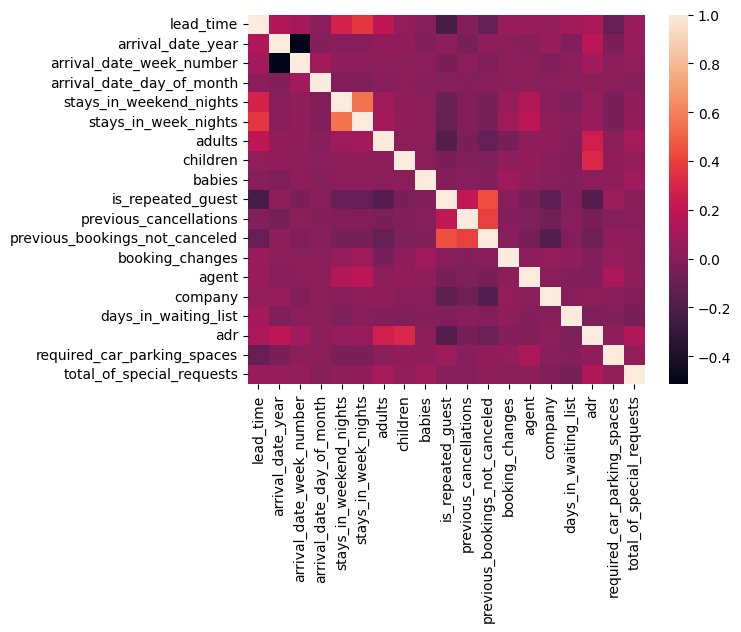

In [48]:
sns.heatmap(num_data.corr())

In [49]:
nn_columns=num_data.columns

Finally scale the data.


In [51]:
r1=np.hstack((num_data[nn_columns].values))

In [54]:
scaler = StandardScaler()
hotel_data_scaled = scaler.fit_transform(r1)
hotel_data_scaled.shape

ValueError: Expected 2D array, got 1D array instead:
array=[1.82827660e+00 2.01500000e+03 2.70000000e+01 ... 8.79393292e-01
 0.00000000e+00 2.00000000e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [52]:
r1

array([1.82827660e+00, 2.01500000e+03, 2.70000000e+01, ...,
       8.79393292e-01, 0.00000000e+00, 2.00000000e+00])

In [53]:
hotel_data_scaled

NameError: name 'hotel_data_scaled' is not defined